<a href="https://colab.research.google.com/github/uday-1729/Relaxation_simulations/blob/main/CEST_Q2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the needed modules and packages for simulations
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math
pi = math.pi

In [2]:
# Populations of the two states Pa and Pb
Pa = 0.95
Pb = 1 - Pa

# The difference in Hz for the two peaks


# A exchange time period of 81 (sec)-1
Kex = 80.96

# Individual rate constants of the two states based on their populations
Kab = Pb * Kex
Kba = Pa * Kex

# Relaxation rate constants of the two states
R1_a = 1.7
R2_a = 15

R1_b = 2
R2_b = 25


# Total exchange time between the two states
T_ex = 0.3

In [7]:
# Function CEST does the simulation for given sweep width in Hz
# Space is for the overall spacing of the spectral sweep
# Field is for giving various field strengths (B1)


def CEST(offlow, offhigh, space, field, dofX, w_major, w_minor):

# w1 for the given field strength
  w1 = 2*pi*field

# The sine and cosine components for the w1 in the given field strength

  w1c = w1*math.cos(0)
  w1s = w1*math.sin(0)

#  Inital M0 matrix which is a 7x1 column matrix
  M0 = np.zeros(shape=(7,1))
  M0[0,0] = 0.5
  M0[3,0] = Pa
  M0[6,0] = Pb

# I0 is the inital magnetization at time 0
  I0 = 1

  offset = np.arange(offlow , offhigh , space )


  del_wa = (dofX - w_major)*80
  del_wb = (dofX - w_minor)*80
  wa = (offset + del_wa)*2*pi
  wb = (offset + del_wb)*2*pi

  I_fin = []

  # for x in range(0 ,len(wa)):
  for x in range(0,len(offset)):
      M = np.array([[0, 0, 0, 0, 0, 0, 0],
          [0 , (-R2_a - Kab), -wa[x] , w1s , Kba , 0 , 0],
          [0 , wa[x] , (-R2_a-Kab) , -w1c , 0 , Kba , 0],
          [2*(R1_a*Pa)*I0 , -w1s , w1c , (-R1_a-Kab), 0 , 0 , Kba],
          [0 , Kab , 0 , 0 , -R2_b - Kba, -(wb[x]) , w1s ],
          [0, 0, Kab , 0, wb[x], (-R2_b - Kba ), -w1c],
          [2 * (R1_b * Pb)*I0, 0 , 0 , Kab , -w1s, w1c, (-R1_b - Kba)],
      ])
      Mt = sp.linalg.expm(M)

      I = np.dot((Mt*T_ex) , M0)

      I_0 = M0[3,0]

      I_ratio = np.divide(I , I_0)

      I_fin.append(I_ratio[3,0])

  return I_fin, offset

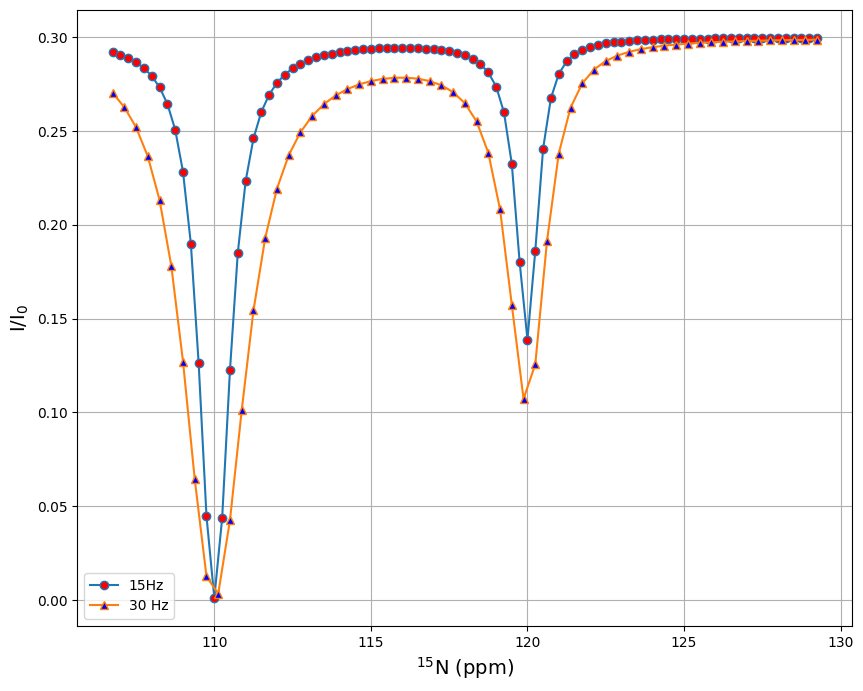

<Figure size 640x480 with 0 Axes>

In [9]:
dofN = 118
major_ppm = 110
minor_ppm = 120


ii0_1, omg = CEST(-900, 920,20,15,dofN, major_ppm, minor_ppm)
ii0_2, omg1 = CEST(-900, 920,30,30,dofN, major_ppm, minor_ppm)

fig = plt.figure(figsize = (10 ,8))


plt.plot((omg/80 + dofN*np.ones(shape=omg.shape)) , ii0_1 , 'o-' , markerfacecolor = 'red', label = '15Hz')

plt.plot((omg1/80 + dofN*np.ones(shape=omg1.shape)) , ii0_2 , '^-' , markerfacecolor = 'blue' , label = '30 Hz')

plt.xlabel(r"$^{15}$N (ppm)" , fontsize = 14)

plt.ylabel(r"I/I$_{0}$" , fontsize = 14)

plt.legend()
plt.grid(True)
plt.show()
plt.savefig("CEST_simulation.png" , format= 'png' , dpi = 200)